<a href="https://colab.research.google.com/github/TheZombie272/Microarray-Cancer-Types-ML/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importaciones

importación de las librerías, voy a importar las mismas que se usaron en el paper

In [2]:
# Manipulación y visualización de datos
import seaborn as sn; sn.set()
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option

# Métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

# Preprocesamiento y algoritmos de Maching Learning
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
path_sampledata = "/content/drive/MyDrive/Universidad/MachingLearning/Tarea1/data11tumors2.csv"
data = pd.read_csv(path_sampledata)

# Análisis exploratorio

Basandome en el paper, la persona fue directamente a un preprocesamiento de los datos, en mi caso, voy a comenzar con un analisis exploratorio para así entender mejor mi dataset. Entiendo que para este dataset no va a ser interesante el análisis exploratorio ya que hay una gran cantidad de features para analisar.

In [5]:
data

,Class,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D12524,D12525,D12526,D12527,D12528,D12529,D12530,D12531,D12532,D12533
0,7,153,228,32,30,-36,48,984,-19,537,...,100,30,83,28,57,106,128,5,74,-188
1,7,154,99,43,55,66,63,5051,-26,1001,...,27,43,90,30,82,485,896,-2,91,-78
2,7,84,85,19,28,-104,28,2387,-80,1131,...,-32,51,110,10,86,62,76,-47,92,-103
3,7,234,169,40,36,81,6,2657,-6,1214,...,43,52,82,12,135,60,69,22,89,-180
4,7,104,58,42,13,107,5,3562,18,1464,...,159,42,73,1,82,60,50,30,74,-198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0,157,578,40,58,5,-49,57,-29,3306,...,4,45,64,37,169,91,180,-4,60,-142
170,0,286,882,110,-19,-142,-66,-5,23,2701,...,-91,130,137,-61,75,36,58,44,161,-433
171,0,579,667,55,-41,-98,-138,-164,-61,2812,...,-110,107,199,-60,59,8,77,-42,171,-371
172,0,252,582,88,3,44,-162,553,-150,2020,...,-66,92,-26,-44,148,43,73,0,201,-333


## Inspección básica

Dimensiones de dataset

In [6]:
print("Dimensiones del dataset:")
print(f"Filas (muestras): {data.shape[0]}")
print(f"Columnas (genes + clase): {data.shape[1]}")


Dimensiones del dataset:
Filas (muestras): 174
Columnas (genes + clase): 12534


Tipos de datos

In [7]:
print("\nTipos de datos:")
print(data.dtypes)



Tipos de datos:
Class     int64
D1        int64
D2        int64
D3        int64
D4        int64
          ...  
D12529    int64
D12530    int64
D12531    int64
D12532    int64
D12533    int64
Length: 12534, dtype: object


Clases disponibles

In [8]:
print("\nDistribución de clases:")
print(data['Class'].value_counts())


Distribución de clases:
Class
0     27
2     26
7     26
3     23
9     14
10    14
4     12
5     11
1      8
6      7
8      6
Name: count, dtype: int64


Comprobación de valores null

In [9]:
print("\nValores nulos por columna:")
print(data.isnull().sum())

# En base a este resultado podríamos decir que todos los valores no contienen null


Valores nulos por columna:
Class     0
D1        0
D2        0
D3        0
D4        0
         ..
D12529    0
D12530    0
D12531    0
D12532    0
D12533    0
Length: 12534, dtype: int64


Estadísticas descriptivas

In [10]:
print("\nEstadísticas descriptivas:")
print(data.describe())

# Acá no hay mucho que ver ya que son muchas caracterisitcas, demasiadas


Estadísticas descriptivas:
            Class          D1           D2          D3           D4  \
count  174.000000  174.000000   174.000000  174.000000   174.000000   
mean     4.425287  218.413793   537.942529   71.965517    83.706897   
std      3.245743  117.290761   268.926376   43.827156   122.828468   
min      0.000000 -122.000000    30.000000  -24.000000   -80.000000   
25%      2.000000  148.750000   360.000000   44.000000    24.250000   
50%      4.000000  210.500000   520.500000   65.000000    65.000000   
75%      7.000000  281.750000   706.750000   87.750000   111.000000   
max     10.000000  616.000000  1419.000000  247.000000  1307.000000   

               D5          D6           D7            D8           D9  ...  \
count  174.000000  174.000000   174.000000    174.000000   174.000000  ...   
mean   -67.155172  -16.568966   644.988506     76.609195  1472.890805  ...   
std    141.340339   62.832499  1092.470272    863.362875   650.125888  ...   
min   -900.000000 -2

## Limpieza y detección de valores atípicos

Vamos a ver si la columna clase está bien definida

In [11]:
print(data['Class'].unique())
print(data['Class'].value_counts())


[ 7  1  2  3  4  5  6  0  8  9 10]
Class
0     27
2     26
7     26
3     23
9     14
10    14
4     12
5     11
1      8
6      7
8      6
Name: count, dtype: int64


Vamos a tomar 5 genes de forma aleatoria para ver si hay valores atípicos

In [12]:
# Para 5 genes aleatorios
print(data.iloc[:, [0, 100, 1000, 2000, 5000]].describe())

# Todo muy normal

            Class        D100       D1000       D2000       D5000
count  174.000000  174.000000  174.000000  174.000000  174.000000
mean     4.425287  274.471264   20.965517 -130.764368  -12.017241
std      3.245743  106.002382   20.184953  114.371955   24.154243
min      0.000000  103.000000  -25.000000 -943.000000  -96.000000
25%      2.000000  191.250000    8.000000 -184.250000  -23.750000
50%      4.000000  254.000000   18.000000 -108.500000  -12.000000
75%      7.000000  334.750000   29.750000  -69.000000    4.000000
max     10.000000  715.000000  104.000000  121.000000   48.000000


histograma de valores de todos los genes

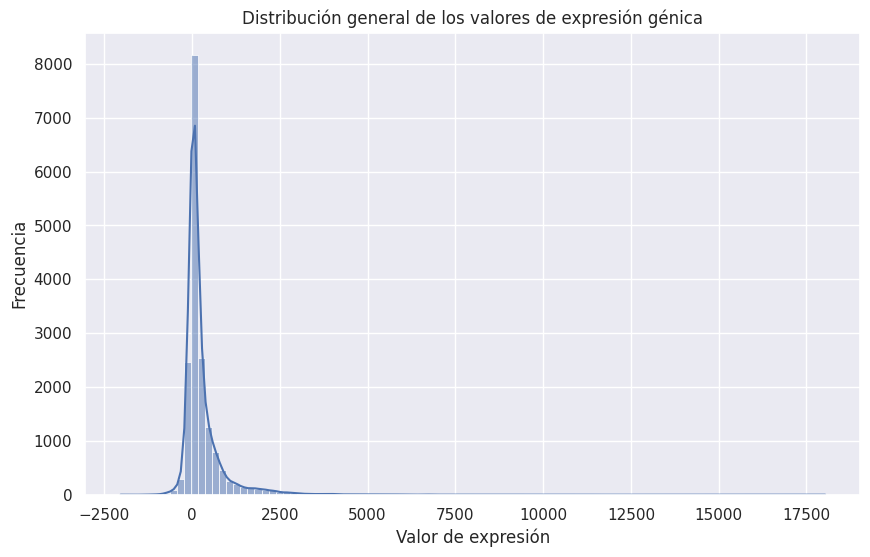

In [13]:
import seaborn as sns

# Tomar una muestra de 100 genes aleatorios
sampled_genes = data.drop(columns='Class').sample(100, axis=1, random_state=42)

# Histograma combinado
plt.figure(figsize=(10, 6))
sns.histplot(sampled_genes.values.flatten(), bins=100, kde=True)
plt.title("Distribución general de los valores de expresión génica")
plt.xlabel("Valor de expresión")
plt.ylabel("Frecuencia")
plt.show()


* Hay valores que se extienden hasta más de 17.000, lo cual indica la presencia de valores extremos, aunque poco frecuentes

* El gráfico muestra una distribución altamente sesgada a la derecha (right-skewed), con la mayoría de los valores de expresión cercanos a 0–500.


## Conclusión para esta etapa
* No se justifica eliminar genes ni muestras aún. En cambio:

## Próximos pasos para limpieza efectiva:
1. Normalizar o escalar los datos → imprescindible para PCA, t-SNE y ML.

2. Detectar y eliminar posibles muestras atípicas solo después del escalado (si vemos cosas raras en visualización).

3. No eliminar outliers en esta etapa, porque los métodos de selección de características (más adelante) van a filtrar muchos genes irrelevantes.

# Preprocesamiento y selección de características

## Normalización/Estandarización

Separar feactures y etiquetas

In [14]:
# 'Class' es la última columna
X = data.drop(columns="Class").values
y = data["Class"].values


Estandarizar con StandardScaler

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Verificación

In [16]:
print("Media por gen (debería ser ≈0):", np.mean(X_scaled, axis=0)[:5])
print("Desviación estándar por gen (≈1):", np.std(X_scaled, axis=0)[:5])

Media por gen (debería ser ≈0): [-6.12536841e-17 -1.02089474e-16 -1.42925263e-16 -2.04178947e-17
  5.74253289e-17]
Desviación estándar por gen (≈1): [1. 1. 1. 1. 1.]


## Reducción de dimensión / selección de genes

instanciar PCA

In [17]:
# Queremos obtener suficientes componentes para visualizar la varianza explicada
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

Visualizar varianza explicada acomulada

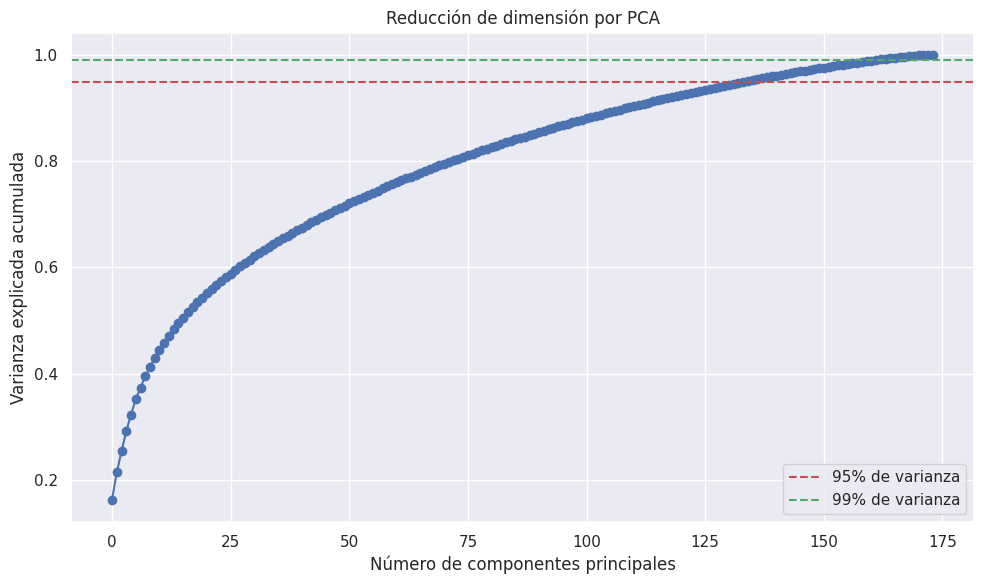

In [18]:
# Varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(explained_variance_ratio, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% de varianza')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% de varianza')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Reducción de dimensión por PCA')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Acá voy a escoger un número de componentes de 140, ya que un rango entre ~ 130 - 150 tiene la varianza del 95% aproximadamente

* Cabe resaltar que en el paper, cuando no escalan usan 83 componentes, mientras escalado usan 113, considero que este es el punto de quiebre entre el paper y lo que estoy realizando, tomo más componentes,

In [19]:
pca = PCA(n_components=0.96, svd_solver='full', tol=1e-4)
X_reduced = pca.fit_transform(X_scaled)
print("Componentes usados:", pca.n_components_)


Componentes usados: 141


Al final toma un valor muy cercano al que había decidido tomar, cambia seguro porque en el paper al igual que en mi producción de este se usa una varianza del 96%

## Estrategia de particionado

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, stratify=y, random_state=42
)


### Punto de quiebre con el paper:

* Voy a balancear las clases en train, esto fue algo que no se hizo en el paper

In [21]:
pd.Series(y_train).value_counts()

,count
2,21
0,21
7,21
3,18
9,11
10,11
4,10
5,9
1,6
6,6


In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=4,random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


Verificamos que quedó balanceado

In [23]:

unique, counts = np.unique(y_train_balanced, return_counts=True)
balance_df = pd.DataFrame({"Class": unique, "Count": counts})
print(balance_df)


    Class  Count
0       0     21
1       1     21
2       2     21
3       3     21
4       4     21
5       5     21
6       6     21
7       7     21
8       8     21
9       9     21
10     10     21


# Modelado: algoritmos de ML

### Logistic Regression


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      0.50      0.67         2
           2       0.67      0.80      0.73         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       0.67      0.67      0.67         3
          10       0.60      1.00      0.75         3

    accuracy                           0.86        35
   macro avg       0.90      0.88      0.87        35
weighted avg       0.89      0.86      0.86        35

=== Logistic Regression (sin balanceo) ===
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


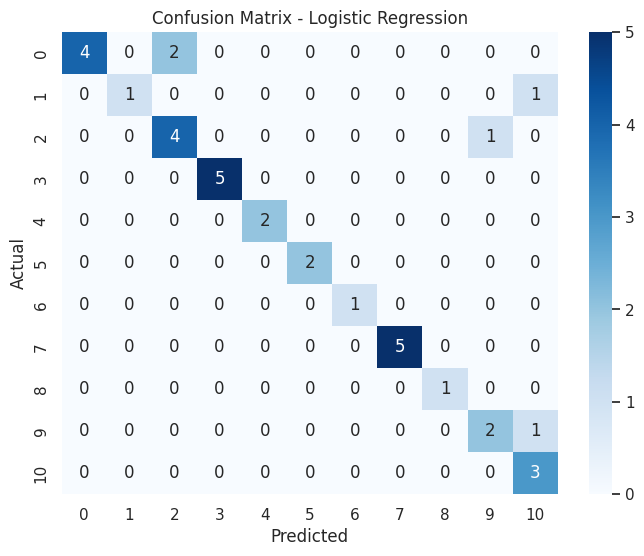

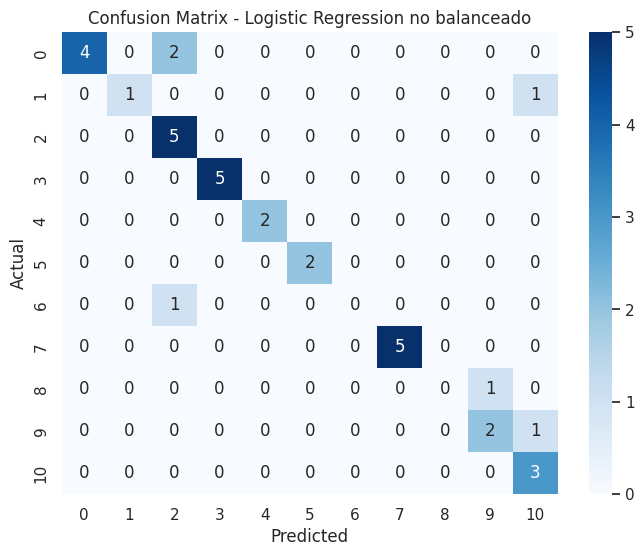

In [29]:
# 1.1. Entrenar para balanceado
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_balanced, y_train_balanced)

# 1.2. Entrenar sin balancear
lr_no_balanceado = LogisticRegression(C=0.1, max_iter=1000, random_state=42)
lr_no_balanceado.fit(X_train, y_train)

# 2. Predecir
y_pred = lr.predict(X_test)
y_pred_no_balanceado = lr_no_balanceado.predict(X_test)

# 3. Reporte de métricas
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred))
print("=== Logistic Regression (sin balanceo) ===")
print(classification_report(y_test, y_pred_no_balanceado))

# 4. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print()

# 4. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_no_balanceado)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression no balanceado")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 86%

Macro avg F1: 0.87

Weighted avg F1: 0.86

Es un resultado bueno a pesar de la variedad de clases, claramente no es el mejos, se obverva buen f1 score en las clases desde la 3 a la 8, con 1 en el recal y presicion, osea, predicciones perfectas, pero:

* Clases 1 y 0 tuvieron recall bajo (50 % y 67 %)
* Clase 2 tiene precision menor (0.67), puede que se confunda con otras
* Clase 10 predijo bien (recall 1.00), pero con precisión 0.60 (falsos positivos).

Cabe resaltar que esa precisión perfecta puede ser por la poca cantidad de muestras, al igual que los errores grandes.

Traté también de comprar con los datoos sin balancear, encuentro que los resultados son los mismos, a pesar de que hay un cambio en el accuracy, teniendo más el modelo donde los datos no están balanceados, es lo mismo, en realidad cometieron los mismos erroes ambos modelos y no considero tomarlo en cuenta, claro, si la estoy cagando con esto, ya en las siguientes tareas me daré de cuenta de mi error.

### Support Vector Machine

=== Support Vector Machine (SVM) ===
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.00      0.00      0.00         2
           2       0.36      1.00      0.53         5
           3       0.83      1.00      0.91         5
           4       1.00      0.50      0.67         2
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         5
           8       0.00      0.00      0.00         1
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3

    accuracy                           0.71        35
   macro avg       0.65      0.55      0.55        35
weighted avg       0.77      0.71      0.69        35



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


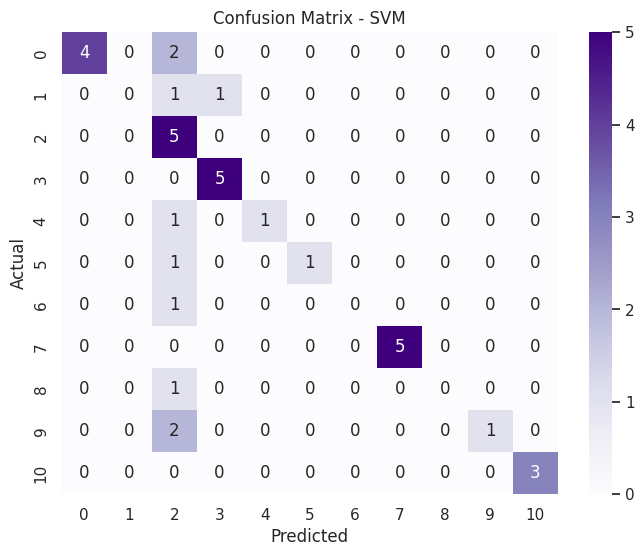

In [25]:
# 1. Crear el modelo
svm = SVC(class_weight='balanced', kernel='rbf', C=1.0, gamma='scale', random_state=42)

# 2. Entrenar con datos balanceados
svm.fit(X_train_balanced, y_train_balanced)

# 3. Predecir sobre validación
y_pred_svm = svm.predict(X_test)

# 4. Reporte
print("=== Support Vector Machine (SVM) ===")
print(classification_report(y_test, y_pred_svm))

# 5. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Análisis de errores
Clases mal clasificadas o no detectadas:
* Clase 1: F1-score = 0.00 → el modelo no la detectó en absoluto.

* Clase 6 y 8: recall 0.00 → también completamente omitidas.

* Clase 9: solo 1 de 3 fue correctamente clasificada.

Muchas confusiones hacia clase 2 (fue sobrepredicha).

### Random Forest

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      1.00      1.00         2
           2       0.57      0.80      0.67         5
           3       1.00      1.00      1.00         5
           4       1.00      0.50      0.67         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       0.00      0.00      0.00         1
           9       0.50      0.67      0.57         3
          10       1.00      1.00      1.00         3

    accuracy                           0.83        35
   macro avg       0.81      0.75      0.76        35
weighted avg       0.84      0.83      0.82        35



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


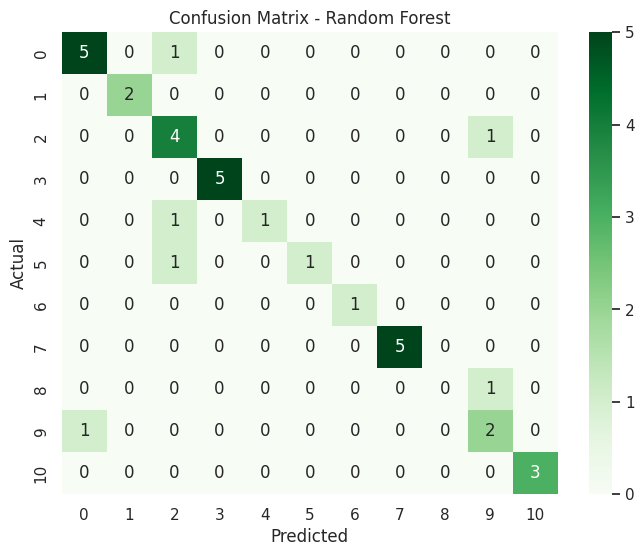

In [26]:

# 1. Crear el modelo
rf = RandomForestClassifier(
    n_estimators=100,       # número de árboles
    max_depth=None,         # sin límite de profundidad
    class_weight='balanced',# balanceo automático por si acaso
    random_state=42
)

# 2. Entrenar con datos balanceados
rf.fit(X_train_balanced, y_train_balanced)

# 3. Predecir sobre validación
y_pred_rf = rf.predict(X_test)

# 4. Reporte
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))

# 5. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy	83%

Macro F1-score	0.76

Weighted F1-score	0.82

* Clases 1, 3, 6, 7, 10: predicción perfecta (precision y recall = 1.0).

* Clase 0 y 2: desempeño aceptable (83 % y 67 % F1).

* Clase 8: completamente omitida (0.0 en todas las métricas).

* Clases 4, 5 y 9: recall o precision algo flojos (50 %-67 %).

Logistic Regression sigue liderando, pero RF le pisa los talones y podría mejorar con tuning



### K‑Nearest Neighbors

=== K-Nearest Neighbors (k-NN) ===
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       1.00      0.50      0.67         2
           2       0.75      0.60      0.67         5
           3       0.83      1.00      0.91         5
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       0.33      0.33      0.33         3
          10       0.40      0.67      0.50         3

    accuracy                           0.74        35
   macro avg       0.82      0.75      0.76        35
weighted avg       0.77      0.74      0.74        35



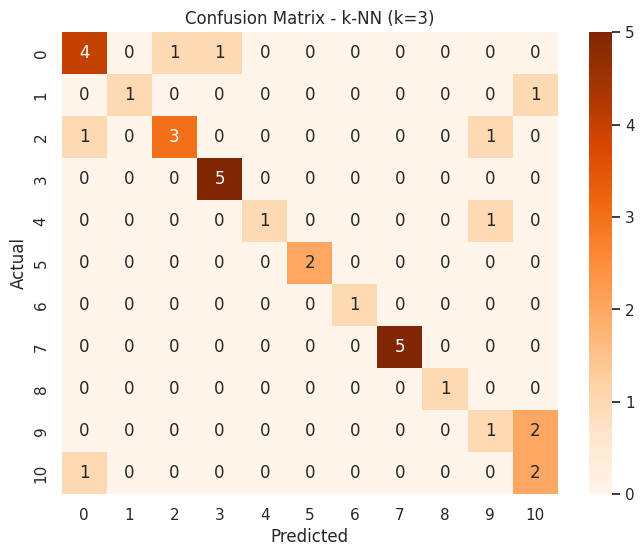

In [27]:
# 1. Crear el modelo
knn = KNeighborsClassifier(n_neighbors=1)

# 2. Entrenar con datos balanceados
knn.fit(X_train_balanced, y_train_balanced)

# 3. Predecir sobre validación
y_pred_knn = knn.predict(X_test)

# 4. Reporte
print("=== K-Nearest Neighbors (k-NN) ===")
print(classification_report(y_test, y_pred_knn))

# 5. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - k-NN (k=3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy	74 %

Macro F1-score	0.76

Weighted F1-score	0.74

**Observaciones:**

* Clases 3, 5, 6, 7, 8: F1-score = 1.00

* Clase 2: desempeño aceptable

* Mejor que SVM, cercano a Random Forest

* Clase 9: F1-score = 0.33 → solo se clasificó correctamente 1 de 3

* Clase 10: precision baja (0.40), aunque recall fue 0.67

* Clase 1: solo 1 de 2 detectado

### Tuning para el modelo de Logistic Regresion

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

logreg = LogisticRegression(max_iter=1000, random_state=42)

# Realiza validación cruzada para todas las combinaciones
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_balanced, y_train_balanced)

print("Mejor C:", grid.best_params_)
print("Accuracy del mejor modelo:", grid.best_score_)

Mejor C: {'C': 1}
Accuracy del mejor modelo: 0.9827012025901943


=== Logistic Regression después del tuning ===
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      0.50      0.67         2
           2       0.67      0.80      0.73         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       0.67      0.67      0.67         3
          10       0.60      1.00      0.75         3

    accuracy                           0.86        35
   macro avg       0.90      0.88      0.87        35
weighted avg       0.89      0.86      0.86        35



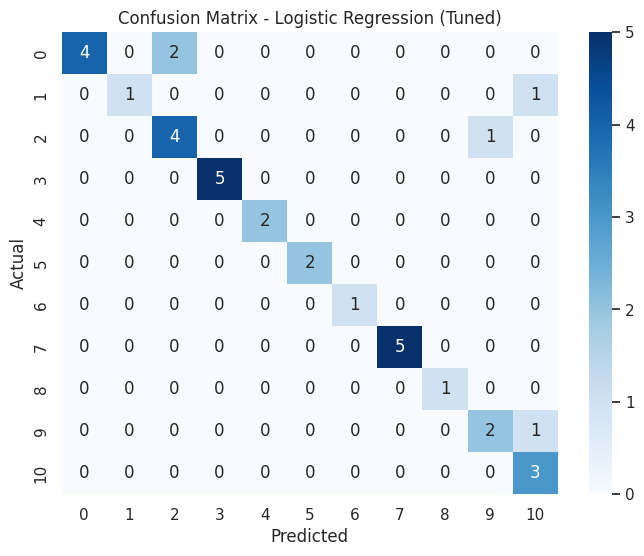

In [34]:

# Reentrenar con el mejor C encontrado
best_logreg = LogisticRegression(C=1, max_iter=1000, random_state=42)
best_logreg.fit(X_train_balanced, y_train_balanced)

y_pred = best_logreg.predict(X_test)


# Reporte
print("=== Logistic Regression después del tuning ===")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Evaluación y comparación

## Comparación de métricas por modelo

## Evaluación comparativa de modelos de Machine Learning
Se evaluaron cinco modelos de clasificación aplicados al conjunto de datos preprocesado (escalado, reducción de dimensión mediante PCA y balanceo con SMOTE). A continuación, se presentan los resultados más relevantes en términos de accuracy, macro promedio y comportamiento por clase:

### 1. Logistic Regression (con balanceo y tuning)
Accuracy: 0.86

Macro F1-score: 0.87

Weighted F1-score: 0.86

Este modelo fue el de mejor rendimiento general, con métricas altas en casi todas las clases. Se destaca su robustez frente a clases poco representadas, obteniendo un desempeño perfecto en múltiples categorías (clases 3 a 8). La regularización óptima (C=1) fue determinada por validación cruzada.

### Logistic Regression (sin balanceo)
Accuracy: 0.83

Macro F1-score: 0.70

Weighted F1-score: 0.81

Aunque logró un accuracy general cercano, su desempeño macro bajó significativamente, con valores de F1=0.0 en clases como la 6 y la 8. Esto evidencia el impacto negativo del desbalance de clases, subestimando categorías minoritarias.

### 2. Support Vector Machine (SVM)
Accuracy: 0.71

Macro F1-score: 0.55

Weighted F1-score: 0.69

Este modelo fue el de peor desempeño general. A pesar de obtener resultados correctos en clases como 3, 7 y 10, falló completamente en otras (como las clases 1, 6 y 8). La baja generalización puede deberse a la sensibilidad de SVM ante datasets pequeños y multicategoría.

### 3. Random Forest
Accuracy: 0.83

Macro F1-score: 0.76

Weighted F1-score: 0.82

Random Forest mostró un rendimiento muy competitivo. Acertó completamente en varias clases, aunque presentó baja cobertura en clases como la 8 y desempeño irregular en la 9. Es un modelo robusto y versátil, con buena precisión incluso sin tuning intensivo.

### 4. K-Nearest Neighbors (k-NN, k=1)
Accuracy: 0.74

Macro F1-score: 0.76

Weighted F1-score: 0.74

A pesar de tener un accuracy inferior al de Random Forest, k-NN mostró un macro F1-score comparable, gracias a su buen comportamiento en clases individuales. Sin embargo, sufre con clases más ambiguas o con pocos ejemplos, como la clase 9.

### Conclusión general
El mejor modelo en términos de balance entre clases y rendimiento global fue Logistic Regression con balanceo y tuning, seguido de cerca por Random Forest.

El uso de SMOTE para el balanceo fue crucial para mejorar el desempeño en clases minoritarias.

Modelos como SVM no se adaptaron bien a la naturaleza del problema y resultaron menos efectivos.

